In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris=load_iris()

In [4]:
columns=['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)

In [5]:
irisDF['target']=iris.target

In [6]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화

2차원으로 표현하기위해 두개의 속성인 sepal length, sepal width를 X,Y축으로 해 품종 데이터 분포 나타내기

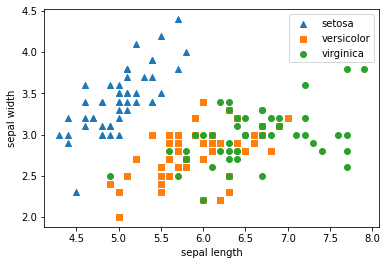

In [7]:
markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

붓꽃데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링 해야한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을받는다. 따라서 여러속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
iris_sclaed=StandardScaler().fit_transform(irisDF)
iris_sclaed2=MinMaxScaler().fit_transform(irisDF)



from sklearn.decomposition import PCA
pca=PCA(n_components=2)
#fit()과 transform()을 호출해 PCA변환 데이터 반환
pca.fit(iris_sclaed)
iris_pca=pca.transform(iris_sclaed)
pca.fit(iris_sclaed2)
iris_pca2=pca.transform(iris_sclaed2)


In [10]:
print(iris_pca.shape,iris_pca2.shape) #넘파이 행렬 형태

(150, 2) (150, 2)


In [11]:
pca_colums=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_colums)
irisDF_pca['target']=iris.target

In [12]:
irisDF_pca

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


In [13]:
pca_colums2=['pca_component_1','pca_component_2']
irisDF_pca2=pd.DataFrame(iris_pca2,columns=pca_colums2)
irisDF_pca2['target']=iris.target
irisDF_pca2

,pca_component_1,pca_component_2,target
0,-0.805687,0.093426,0
1,-0.797823,-0.112785,0
2,-0.833393,-0.068795,0
3,-0.821063,-0.117571,0
4,-0.819475,0.115582,0
...,...,...,...
145,0.743879,0.059311,2
146,0.635203,-0.184028,2
147,0.664104,0.025133,2
148,0.695996,0.134949,2


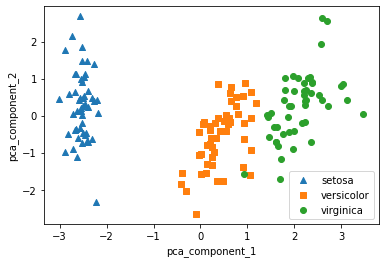

In [14]:
markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

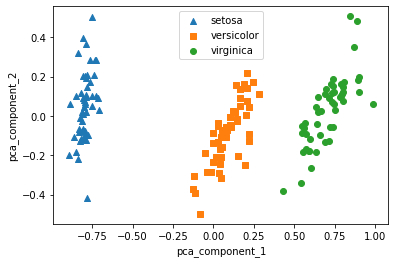

In [15]:
markers=['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data=irisDF_pca2[irisDF_pca2['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca2[irisDF_pca2['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [16]:
#전체 변동성에서 개별 PCA컴포넌트별로 차지하는 변동성 비율 제공
print(pca.explained_variance_ratio_)

[0.88069835 0.07487624]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier(random_state=156)

score=cross_val_score(rfc,iris.data,iris.target,cv=3,scoring='accuracy')

pca_x2=irisDF_pca2[['pca_component_1','pca_component_2']]
pca_score2=cross_val_score(rfc,pca_x2,iris.target,cv=3,scoring='accuracy')

pca_x=irisDF_pca[['pca_component_1','pca_component_2']]
pca_score=cross_val_score(rfc,pca_x,iris.target,cv=3,scoring='accuracy')


In [18]:
print(score)
print(pca_score2)
print(pca_score)

[0.98 0.94 0.96]
[1. 1. 1.]
[0.98 0.98 1.  ]


In [19]:
df=pd.read_excel(r'C:\Users\PC\Desktop\새 폴더\credit_card.xls',sheet_name='Data',header=1)

In [20]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [21]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [22]:
df.rename(columns={'default payment next month':'default'},inplace=True)

In [23]:
y_target=df['default']
x_features=df.drop(['default','ID'],axis=1)

In [24]:
import seaborn as sns
corr=x_features.corr()

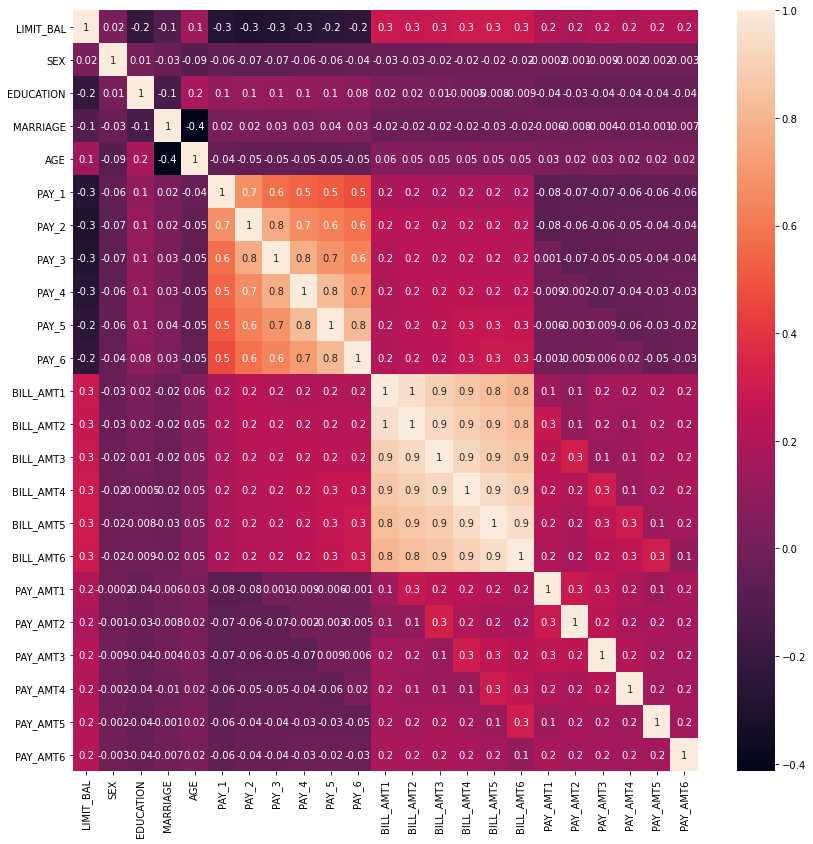

In [25]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [26]:
col_bill=['BILL_AMT'+str(i) for i in range(1,7)]
scaler=MinMaxScaler()
col_scaled=scaler.fit_transform(x_features[col_bill])
pca=PCA(n_components=2)
pca.fit(col_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90802859 0.05451178]


In [28]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, x_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [29]:
# 원본 데이터셋에 먼저 StandardScaler적용
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_features)

pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)

cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

array([0.7891, 0.7882, 0.7955])

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링

In [31]:
iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

LDA는 PCA와 다르게 지도학습이라는 점을 유의, 즉 클래스의 결정값이 변환 시에 필요

LDA객체의 fit()메서드를 호출할 때 결정값이 입력됐음을 유의

In [32]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


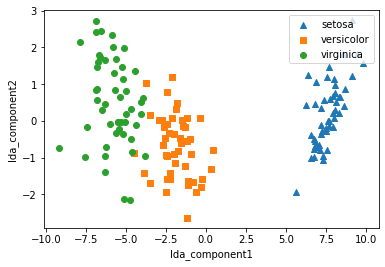

In [33]:
lda_columns=['lda_component1','lda_component2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target
markers=['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component1']
    y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.show()

In [34]:
#넘파이의 svd모듈 임포트
from numpy.linalg import svd
#랜덤 행렬 생성 -> 개별 로우끼리의 의존성을 없애기 위해서
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


생성된 a행렬에 SVD를 적용해 U,Sigma,Vt도출하기

SVD분해는 numpy.linalg.svd파라미터에 원본 행렬을 입력하면 U행렬,Sigma행렬,V전치 행렬 반환, 여기서 Sigma행렬은 대각행렬이고, 0이아닌 값의 경우만 1차원 행렬로 표현한다.

In [35]:
U,Sigma,Vt=svd(a)
print(U.shape,Sigma.shape,Vt.shape)

(4, 4) (4,) (4, 4)


In [39]:
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [40]:
#로우 간 의존성이 있을 경우 Sigma값이 어떻게 변하고, 이에 따른 차원축소가 진행될수 있는지 보기
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했다. 즉, 선형 독립안 로우벡터의 개수가 2개라는 의미(행렬의 Rank가 2)

In [41]:
U,Sigma,Vt=svd(a)
Sigma

array([2.66335286e+00, 8.07035060e-01, 1.30310447e-16, 3.87711837e-17])

In [43]:
U_=U[:,:2]
Sigma=np.diag(Sigma[:2])
Vt=Vt[:2]

array([[ 0.24568427,  0.58278576],
       [-0.77441642, -0.01670951],
       [-0.52873215,  0.56607625],
       [ 0.24568427,  0.58278576]])

**Truncated SVD : Sigma행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만을 추출해 분해하는 방식**

이렇게 분해하면 인위적으로 더 작은 차원의 U,Sigma,Vt로 분해하기 때문에 원본행렬을 정확하게 다시 원복할수는 없다. 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본행렬에 근사할 수 있다. 물론 원래 차원의 차수에 가깝게 잘라낼수록 원본행렬에 더 가깝게 복원할 수 있다.

Truncated SVD는 넘파이가 아닌 사이파이에서만 지원된다. 일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 한다. 

In [45]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본행렬을 출력하고 SVD를 적용할 경우 U,Sigma,Vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본행렬:\n',matrix)
U,Sigma,Vt=svd(matrix,full_matrices=False)
print(U.shape,Sigma.shape,Vt.shape)
print('Sigma값 행렬\n',Sigma)

원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6) (6,) (6, 6)
Sigma값 행렬
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [47]:
#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD수행
num_components=4
U_tr,Sigma_tr,Vt_tr=svds(matrix,k=num_components)
print(U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('Truncated zSigma값 행렬\n',Sigma_tr)

(6, 4) (4,) (4, 6)
Truncated zSigma값 행렬
 [0.55463089 0.83865238 0.88116505 3.2535007 ]


사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD연산을 수행해 원본행렬을 분해한 뒤 U,Sigma,Vt행렬을 반환하지 않는다. 사이킷런의 Truncated SVD클래스는 PCA와 유사하게 fit,transform을 호출해 원본데이터를 몇 개의 주요 컴포넌트(즉,Truncated SVD의 K컴포넌트 수)로 차원을 축소해 변환한다.

In [48]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
iris=load_iris()
iris_ftrs=iris.data
#2개의 주요 컴포넌트로 Truncated SVD변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

In [55]:
iris_tsvd

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

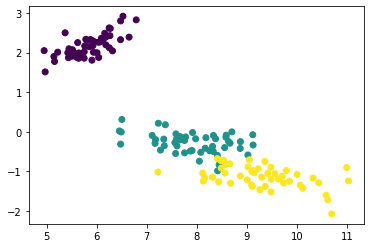

In [57]:
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)

**NMF**

C:\Users\PC\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


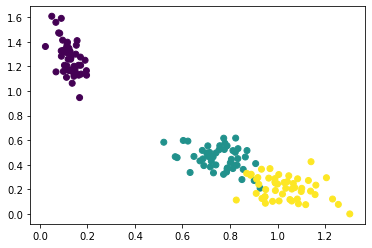

In [59]:
from sklearn.decomposition import NMF
iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)